# Demo 5: Initialization Hyperparamters

Initialization is the first step to gaurantee good training. Each activation function is initialized to be $\phi(x)={\rm scale\_base}*b(x) + {\rm scale\_sp}*{\rm spline}(x)$.
1. $b(x)$ is the base function, default: silu, can be set with ${\rm base\_fun}$

2. ${\rm scale\_base}=1/\sqrt{n_{\rm in}}+e$ where $e$ is drawn from $U[-{\rm noise\_scale\_base},{\rm noise\_scale\_base}]$. Default: ${\rm noise\_scale\_base}=0.1$.

3. ${\rm scale\_sp}=1$

4. ${\rm spline}(x)$ is initialized by drawing coefficients independently from $N(0,({\rm noise\_scale}/G)^2)$ where $G$ is the grid number. Default: ${\rm noise\_scale}=0.1$.


Default setup

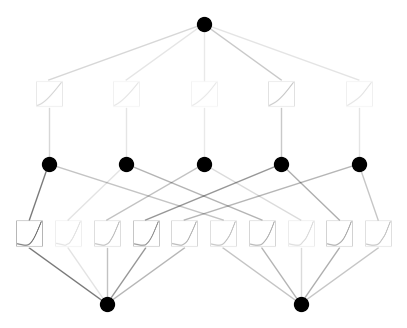

In [8]:
from kan import KAN, create_dataset
import torch

model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
x = torch.normal(0,1,size=(100,2))
model(x) # forward is needed to collect activations for plotting
model.plot()
# model.prune()
# model.plot(mask=True)

Case 1: Initialize all activation functions to be exactly linear. We need to set noise_scale_base = 0., base_fun = identity, noise_scale = 0.

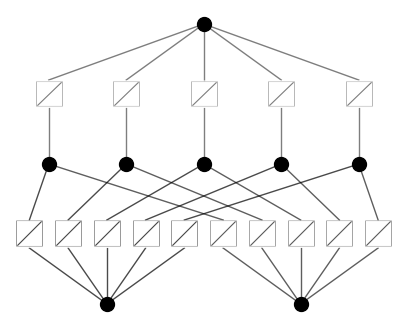

In [9]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, noise_scale_base = 0., base_fun = lambda x: x, noise_scale = 0.)
x = torch.normal(0,1,size=(100,2))
model(x) # forward is needed to collect activations for plotting
model.plot()

Case 2: Noisy spline initialization (not recommended, just for illustration). Set noise_scale to be a large number.

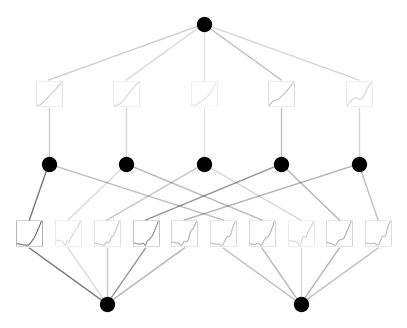

In [10]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, noise_scale=1.)
x = torch.normal(0,1,size=(100,2))
model(x) # forward is needed to collect activations for plotting
model.plot()

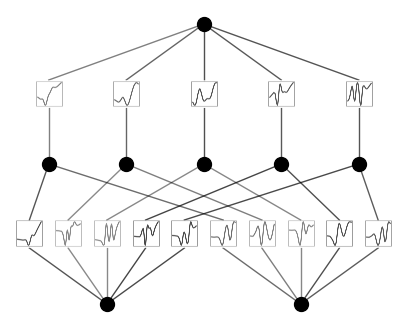

In [11]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, noise_scale=10.)
x = torch.normal(0,1,size=(100,2))
model(x) # forward is needed to collect activations for plotting
model.plot()

Case 3: Break Symmetry. When noise_scale_base is too small, nodes are almost degenerate. Sometimes we want to break such symmetry even at initialization. For an example, please see the PDE demo, where a non-zero noise_scale_base is important for achieving fast convergence.

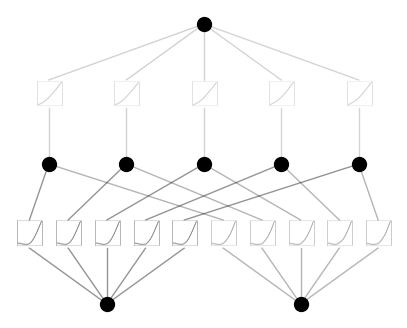

In [5]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, noise_scale_base=0.0)
x = torch.normal(0,1,size=(100,2))
model(x) # forward is needed to collect activations for plotting
model.plot()

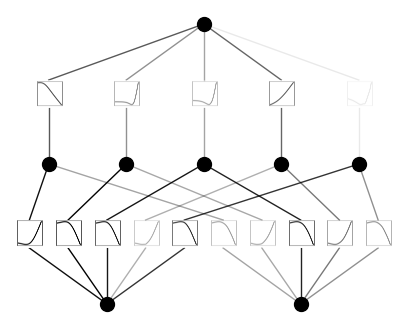

In [6]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, noise_scale_base=1.0)
x = torch.normal(0,1,size=(100,2))
model(x) # forward is needed to collect activations for plotting
model.plot()